In [40]:
from util import load_json, save_json
from spotipy_client import SpotipyClient
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from itertools import product

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from datetime import datetime

client = SpotipyClient()

In [6]:
listened_songs = load_json('listened_songs.json')
liked_songs = load_json('liked_songs.json')
track_information = load_json('track_information.json')
artists_info = load_json('artist_info.json')

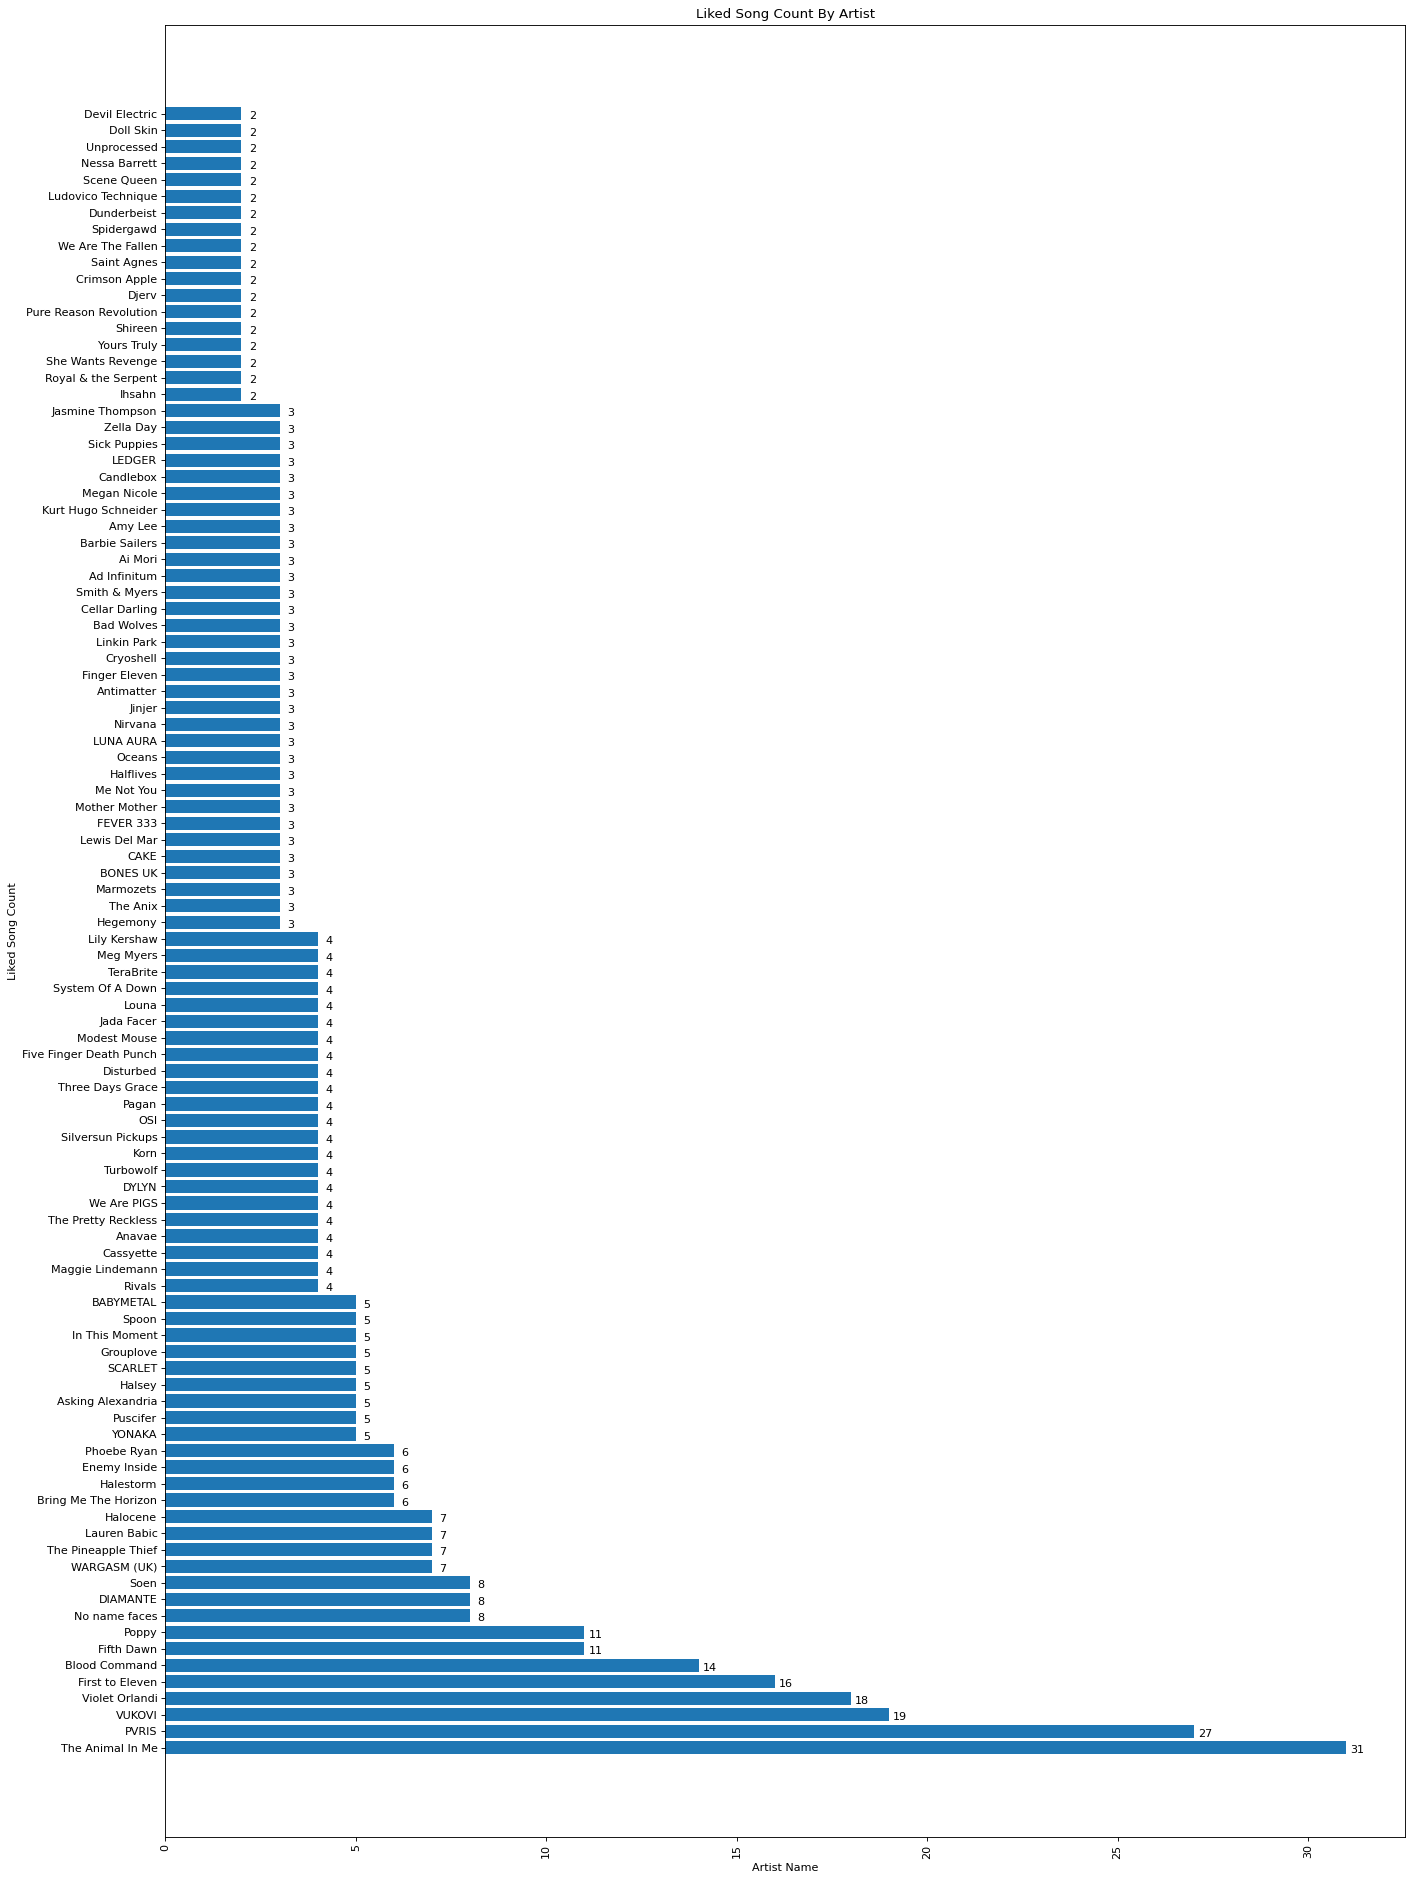

In [3]:
like_count_by_artist = {}
for song in liked_songs:
    track = track_information[song['trackId']]
    for artist in track['artists']:
        name = artist['name']
        if name not in like_count_by_artist:
            like_count_by_artist[name] = 0
        like_count_by_artist[name] += 1

lcba_sorted = {k: v for k, v in sorted(like_count_by_artist.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Liked Song Count By Artist')
plt.xticks(rotation='vertical')
plt.xlabel('Artist Name')
plt.ylabel('Liked Song Count')


for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()

You're Beautiful by James Blunt


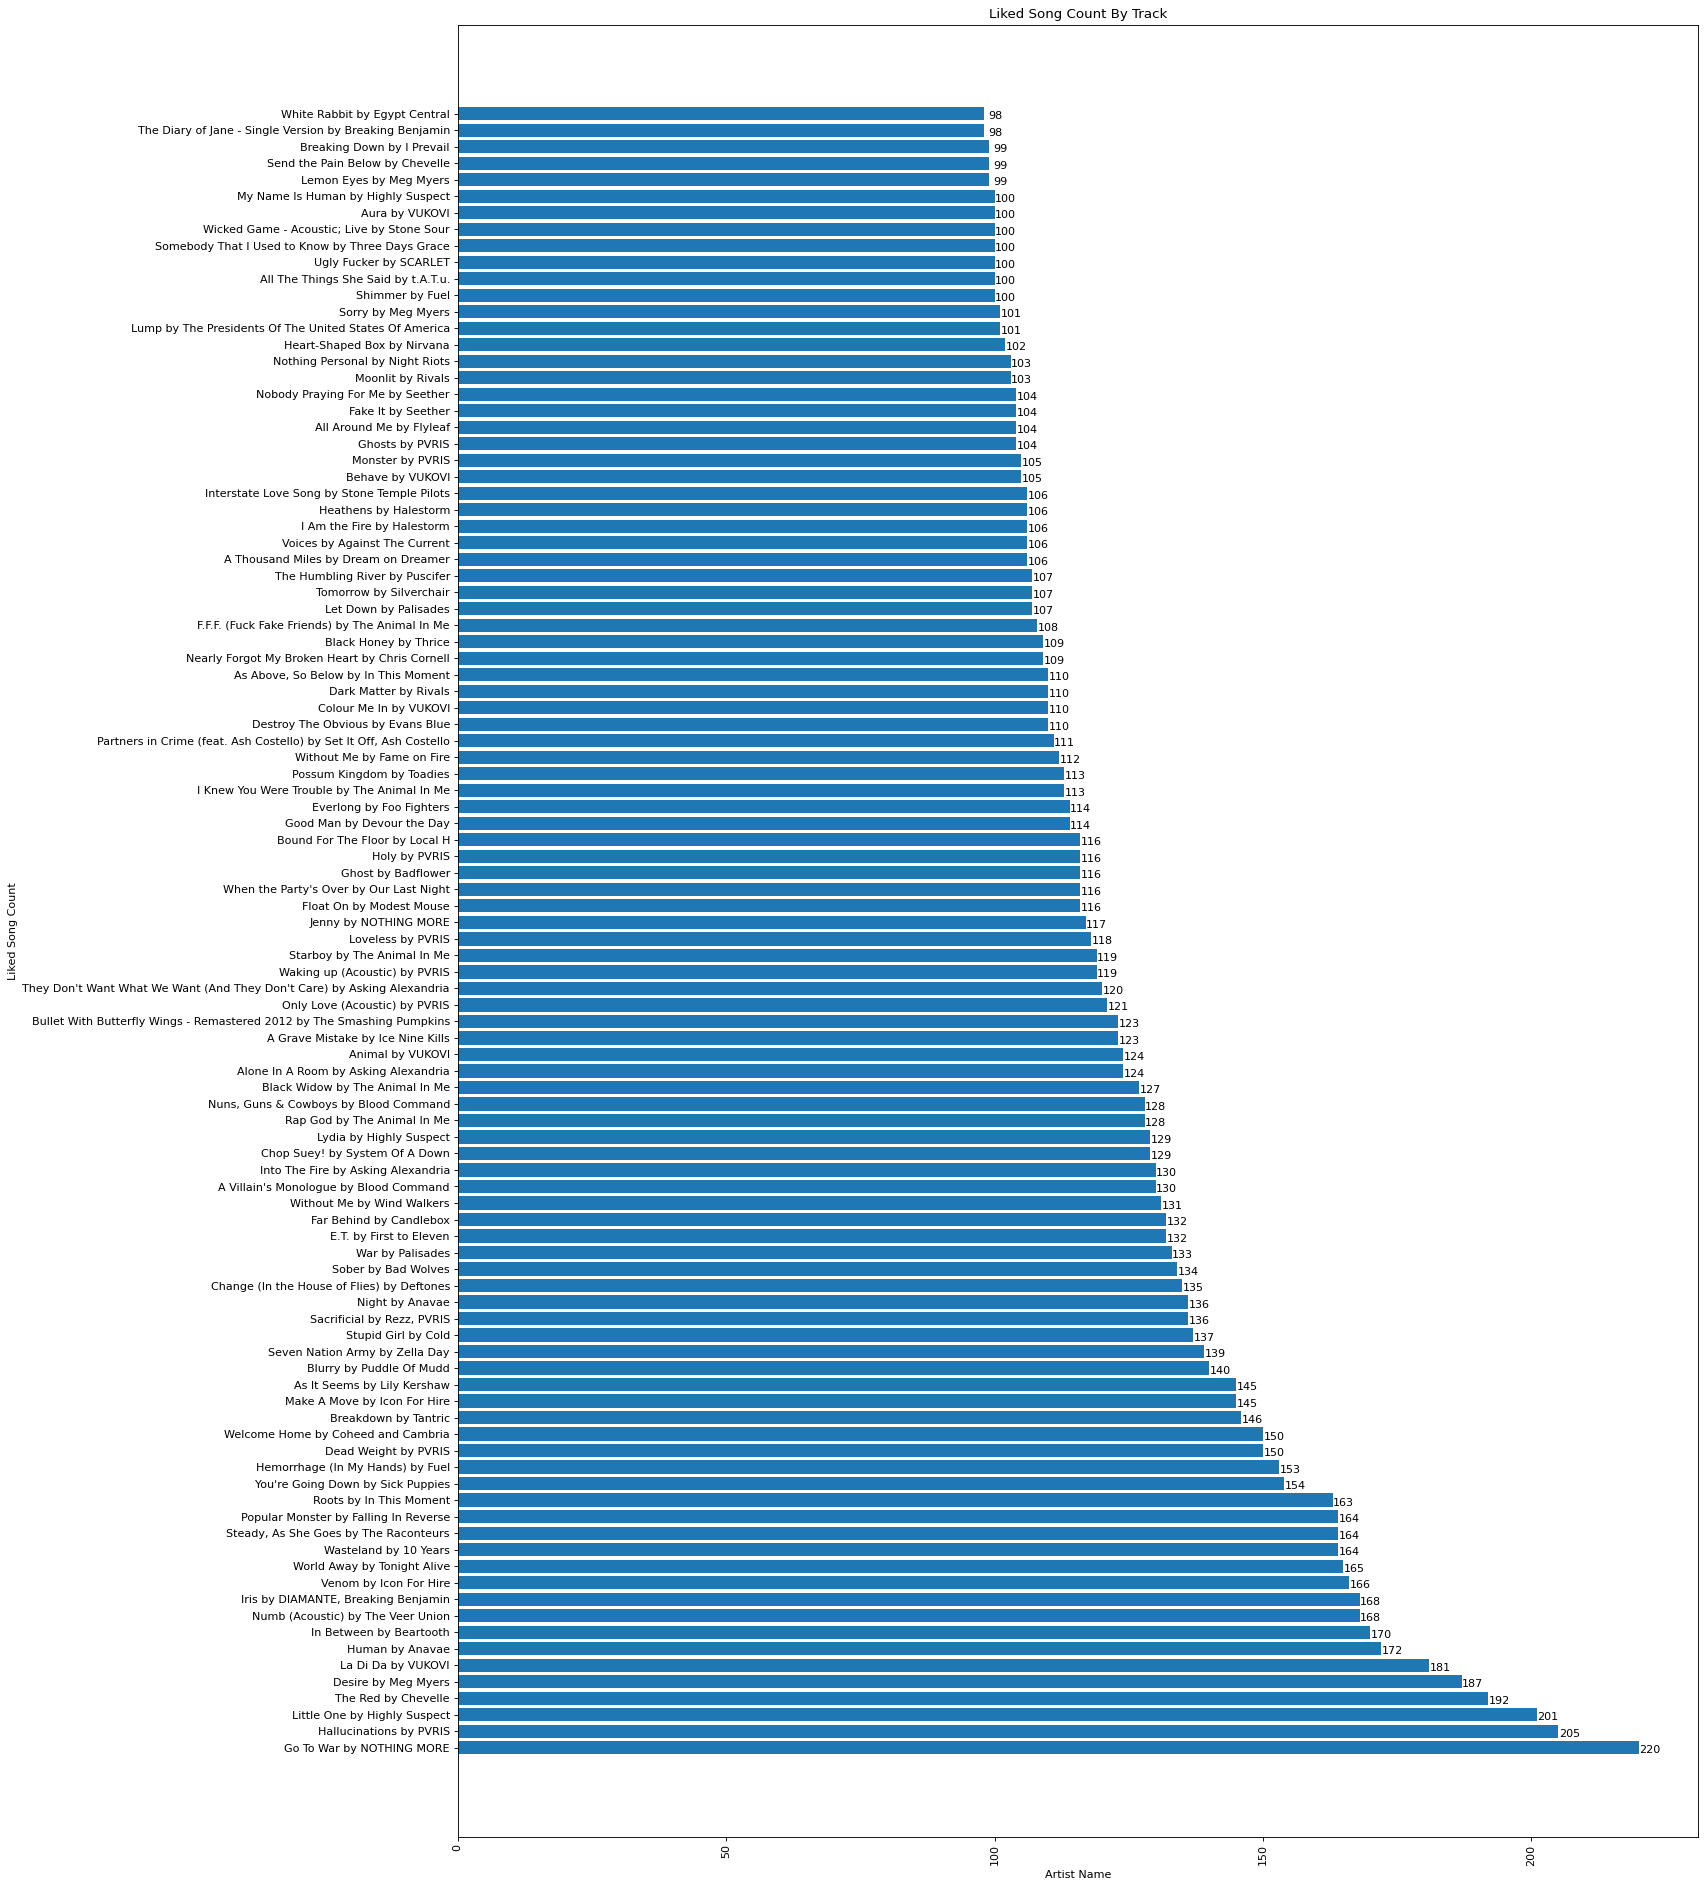

In [8]:
listen_count_by_track = {}
for song in listened_songs:
    if song['trackId'] not in track_information:
        print(song['trackName'] + ' by ' + song['artistName'])
        continue
    track = track_information[song['trackId']]
    name = track['name'] + ' by ' + ', '.join([a['name'] for a in track['artists']])
    if name not in listen_count_by_track:
        listen_count_by_track[name] = 0
    listen_count_by_track[name] += 1

lcba_sorted = {k: v for k, v in sorted(listen_count_by_track.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Listen Count By Track')
plt.xticks(rotation='vertical')
plt.xlabel('Track Name')
plt.ylabel('Listen Count By Track')


for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()

You're Beautiful by James Blunt


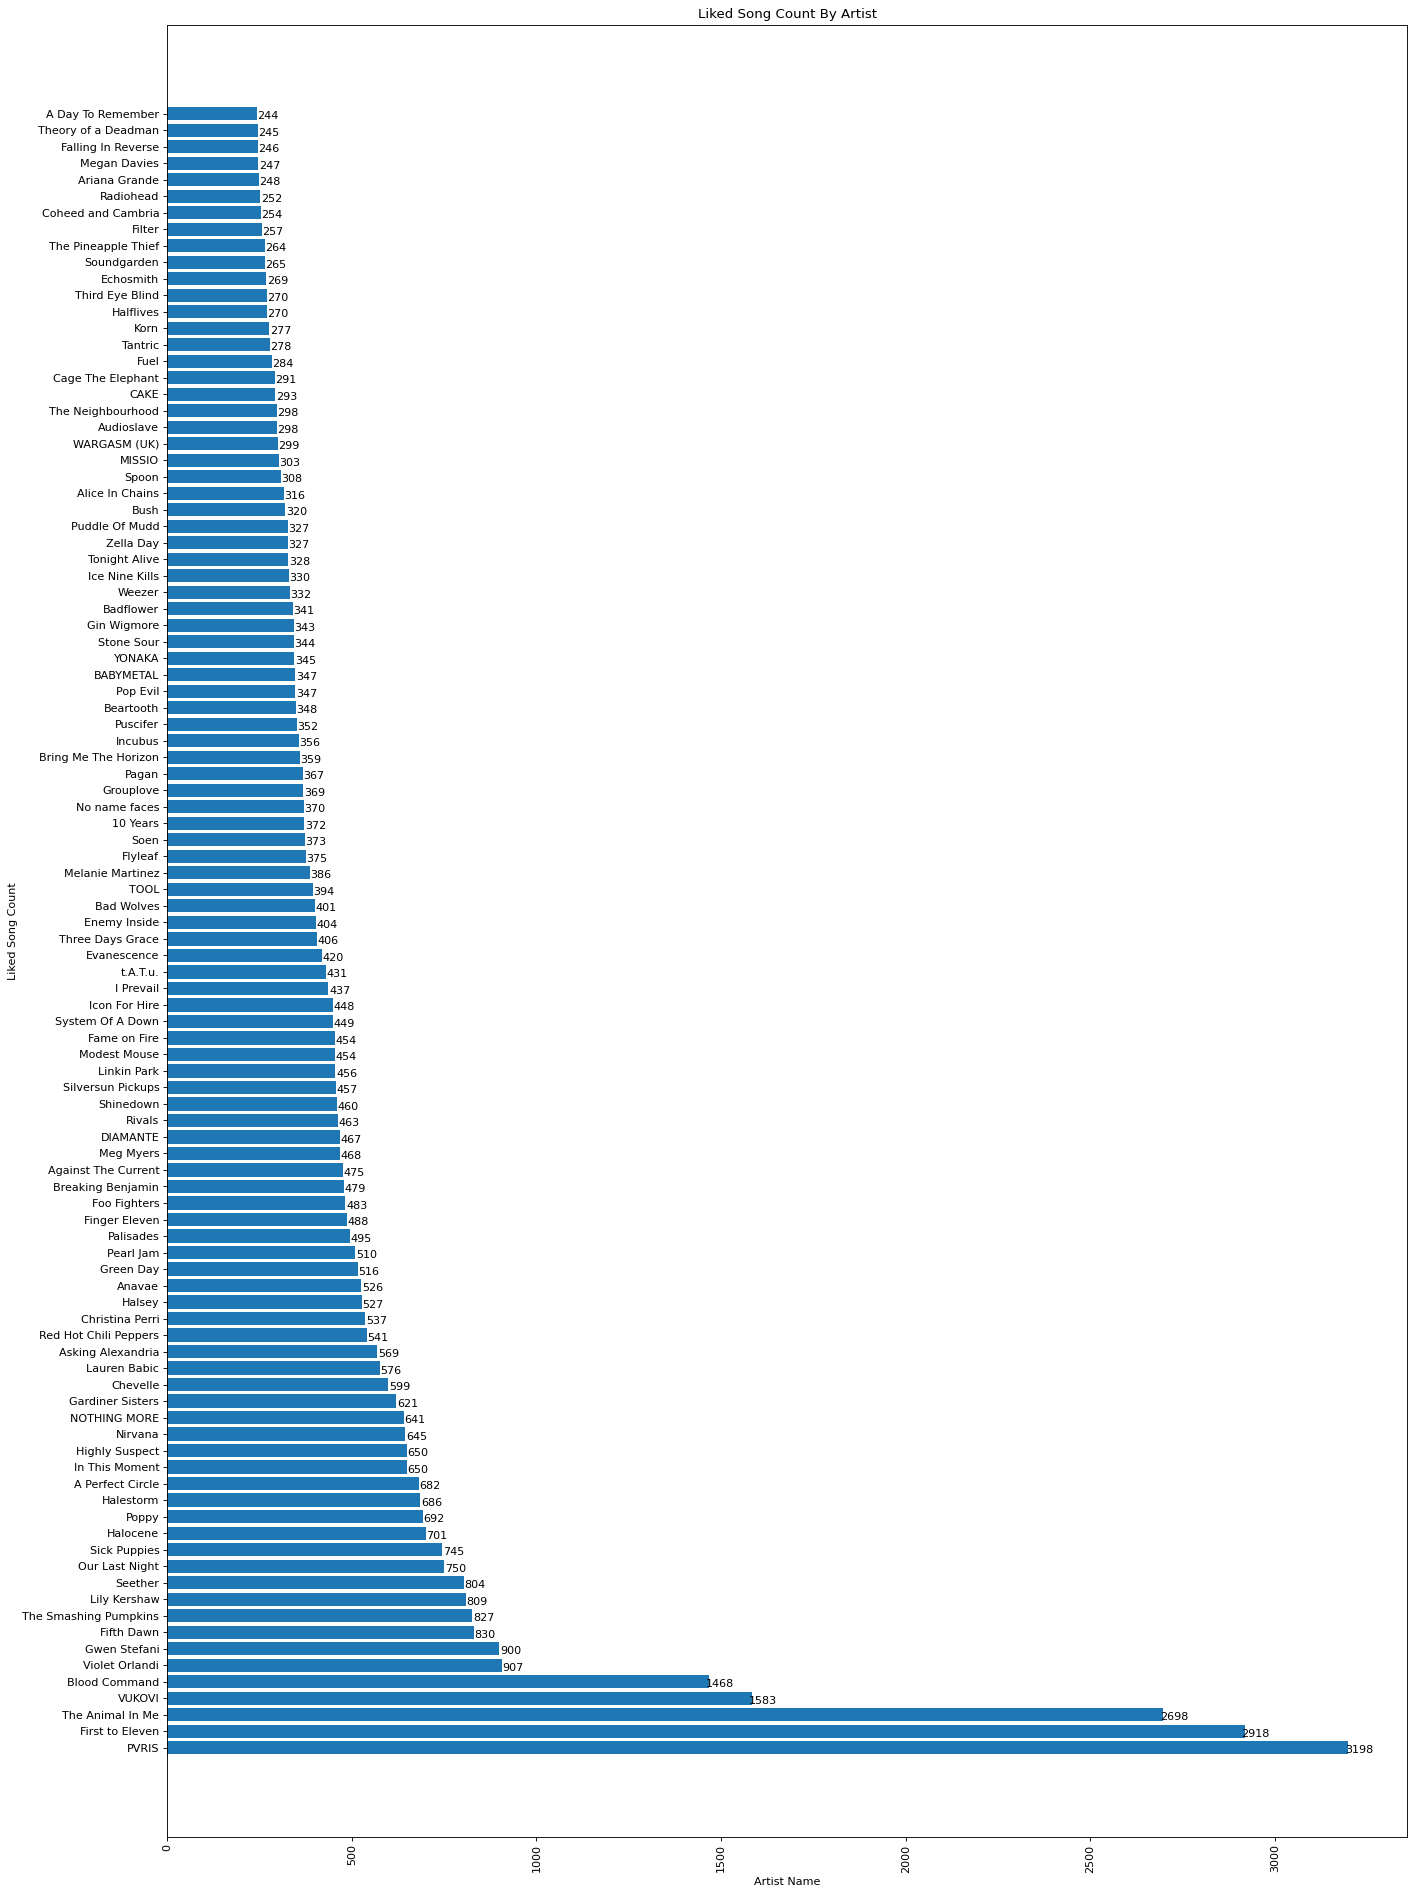

In [9]:
listen_count_by_artist = {}
for song in listened_songs:
    if song['trackId'] not in track_information:
        print(song['trackName'] + ' by ' + song['artistName'])
        continue
    track = track_information[song['trackId']]
    for artist in track['artists']:
        name = artist['name']
        if name not in listen_count_by_artist:
            listen_count_by_artist[name] = 0
        listen_count_by_artist[name] += 1

lcba_sorted = {k: v for k, v in sorted(listen_count_by_artist.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Liked Song Count By Artist')
plt.xticks(rotation='vertical')
plt.xlabel('Artist Name')
plt.ylabel('Liked Song Count')

for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()

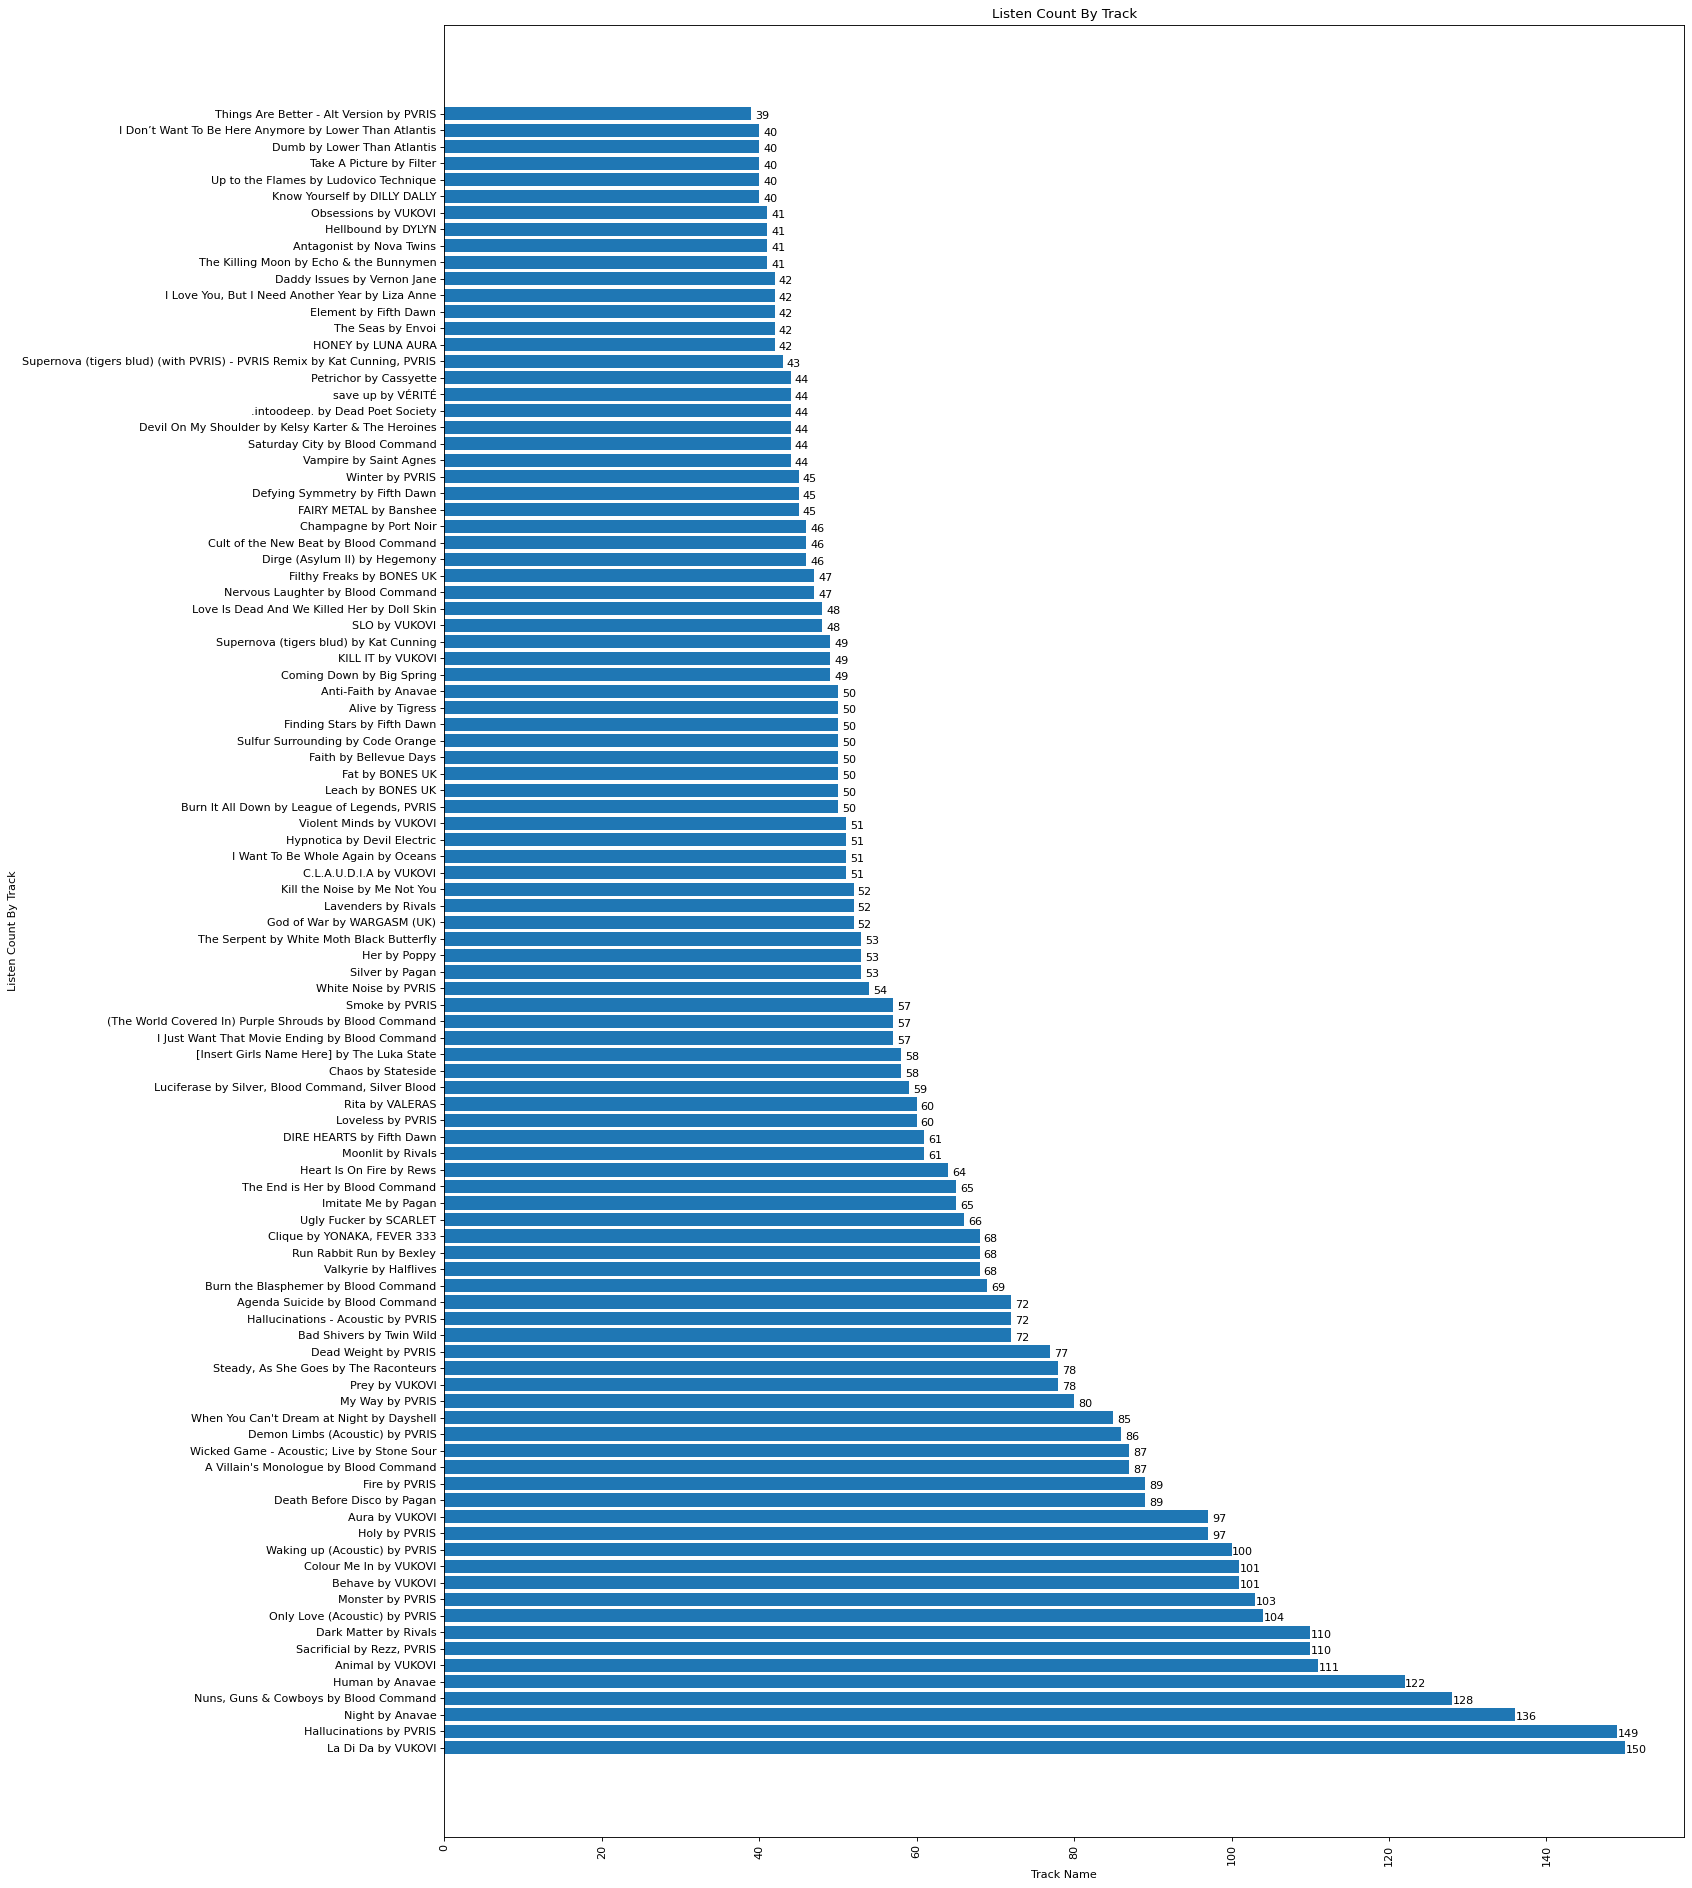

In [12]:
listen_count_by_track = {}
for song in listened_songs:
    date = datetime.strptime(song['endTime'], '%Y-%m-%d %H:%M')
    if (datetime.now() - date).days > 365:
        continue

    if song['trackId'] not in track_information:
        print(song['trackName'] + ' by ' + song['artistName'])
        continue
    track = track_information[song['trackId']]
    name = track['name'] + ' by ' + ', '.join([a['name'] for a in track['artists']])
    if name not in listen_count_by_track:
        listen_count_by_track[name] = 0
    listen_count_by_track[name] += 1

lcba_sorted = {k: v for k, v in sorted(listen_count_by_track.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Listen Count By Track')
plt.xticks(rotation='vertical')
plt.xlabel('Track Name')
plt.ylabel('Listen Count By Track')


for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()

You're Beautiful by James Blunt
pop 131532 552135 23.82%
rock 145570 552135 26.36%
metal 97992 552135 17.75%
pixie 18635 552135 3.38%


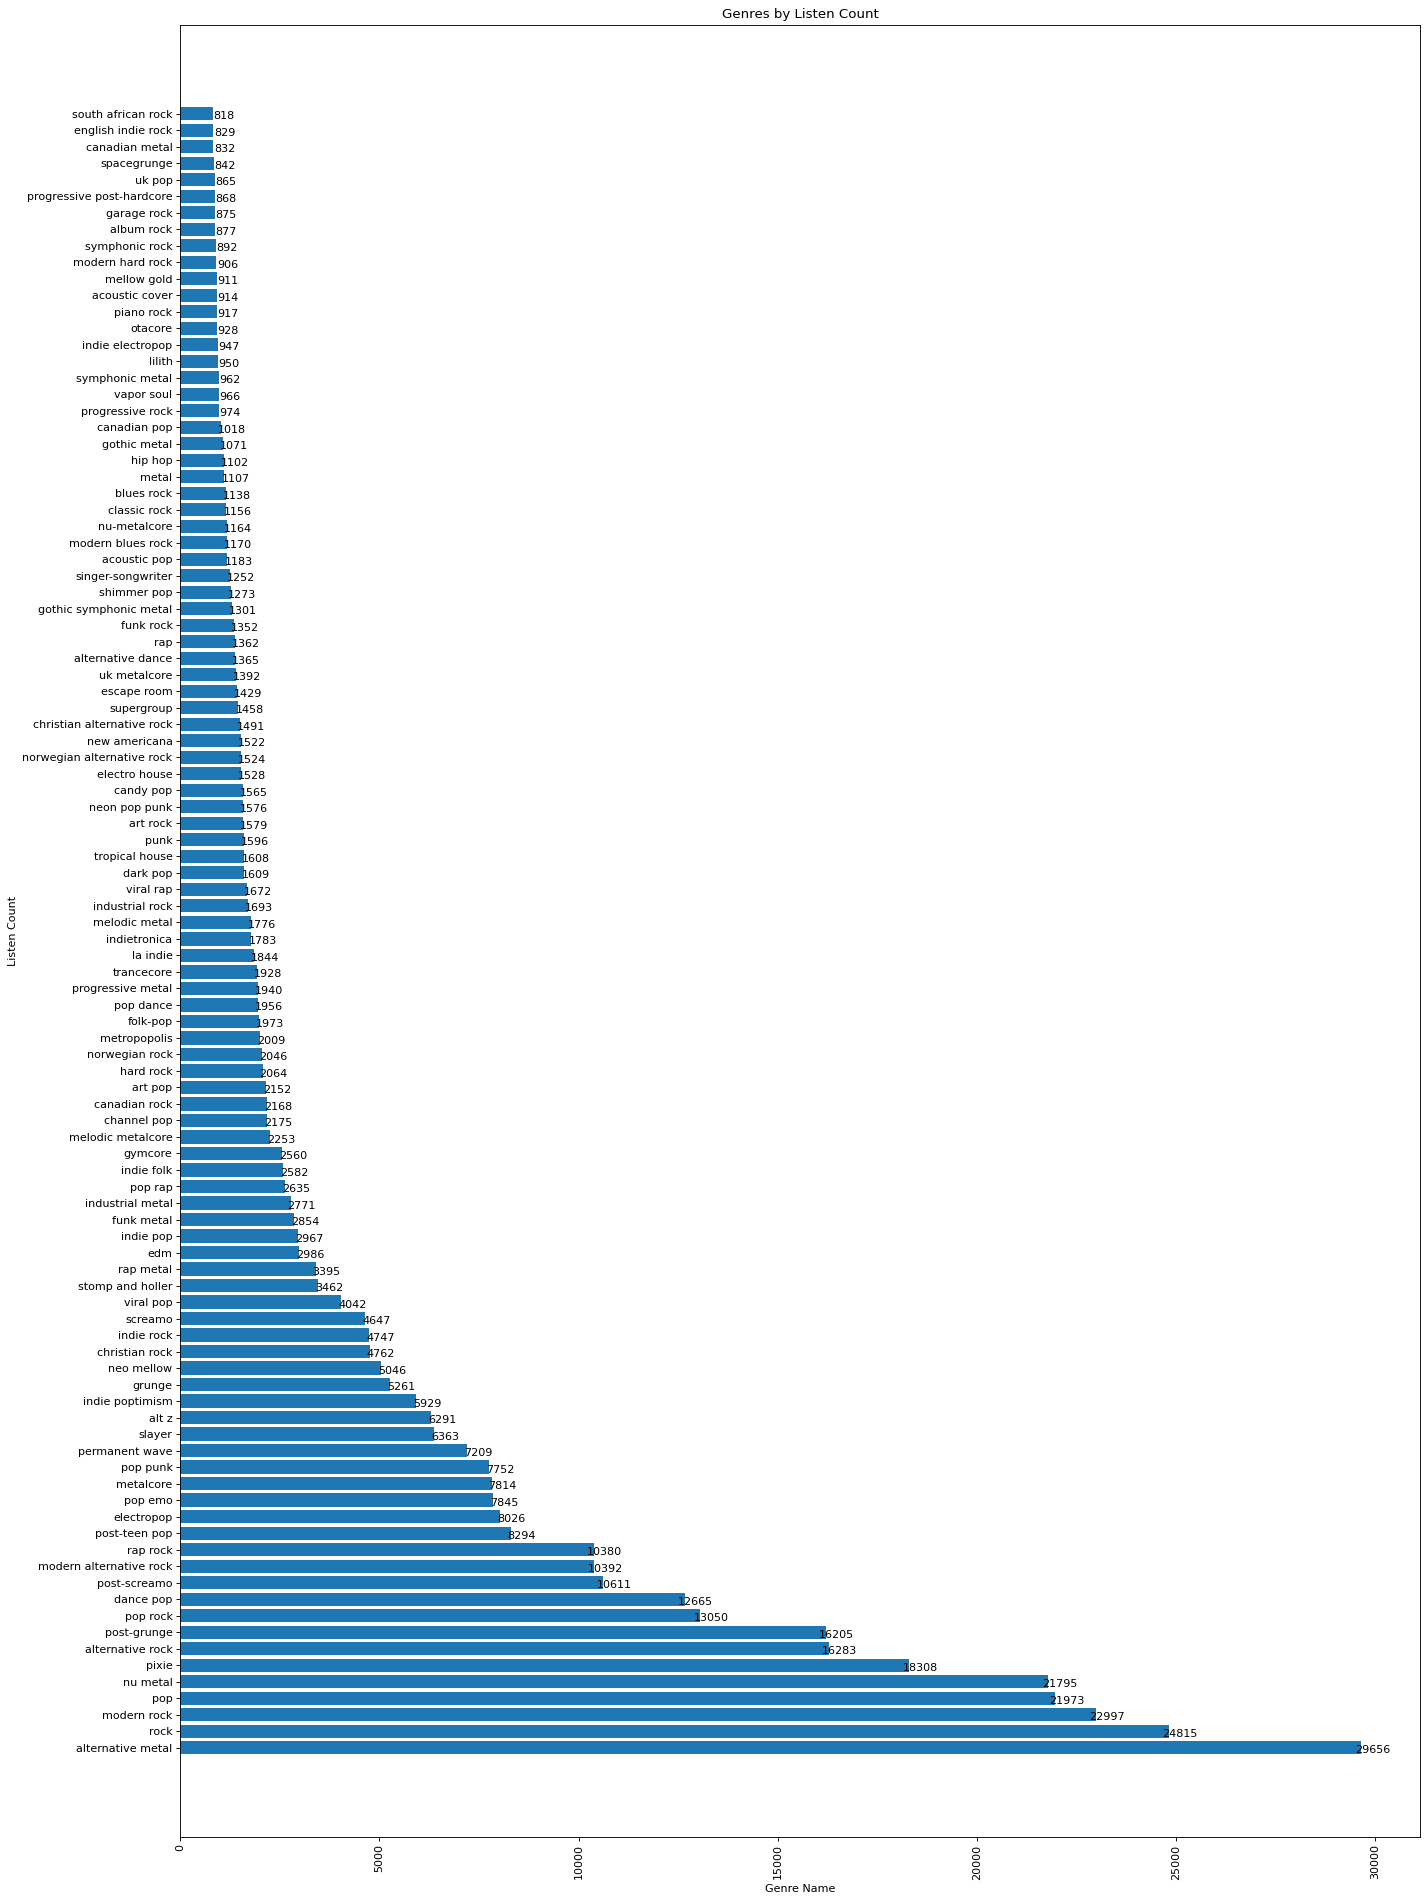

In [62]:
genres_by_listen_count = {}
categories = ['pop', 'rock', 'metal', 'pixie']
counts = [0 for _ in range(len(categories))]
all_listens = 0
for song in listened_songs:
    if song['trackId'] not in track_information:
        print(song['trackName'] + ' by ' + song['artistName'])
        continue
    track = track_information[song['trackId']]
    for artist in track['artists']:
        artist_info = artists_info[artist['id']]
        for genre in artist_info['genres']:
            if genre not in genres_by_listen_count:
                genres_by_listen_count[genre] = 0
            genres_by_listen_count[genre] += 1
            for ix, category in enumerate(categories):
                if category in genre:
                    counts[ix] += 1
            all_listens += 1
for ix, category in enumerate(categories):
    print(category, counts[ix], all_listens, str(round(counts[ix] / all_listens * 100, 2)) + '%')

lcba_sorted = {k: v for k, v in sorted(genres_by_listen_count.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Genres by Listen Count')
plt.xticks(rotation='vertical')
plt.xlabel('Genre Name')
plt.ylabel('Listen Count')


for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()

In [14]:
df = pd.read_csv('listened_data.csv')

In [15]:
df.head()

,Unnamed: 0,Artist Name,Track Name,ms Played,Listen Count,Key,Tempo,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Liked
0,0,Violet Orlandi,Beggin' - Metal Cover,103474,36,2,133.946,0.541,0.910,-6.651,0.0963,0.0631,0.1120,0.279,True
1,1,Grouplove,Colours,257786,48,6,93.933,0.529,0.830,-5.428,0.0397,0.0211,0.0983,0.318,True
2,2,Dream State,Crawling,212240,31,3,104.991,0.521,0.506,-8.599,0.0299,0.1840,0.1090,0.215,False
3,3,DON BROCO,Technology,216533,4,10,116.840,0.668,0.718,-5.530,0.1420,0.0106,0.0588,0.830,False
4,4,Alec Benjamin,Boy In The Bubble,181705,55,11,143.982,0.817,0.578,-7.579,0.0824,0.2240,0.2510,0.851,True


In [28]:
headers = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Valence']
plt.ioff()

def make_2d_plot(key1, key2):
    fig = plt.figure(figsize=(20, 20))
    plt.scatter(
        df.loc[df['Liked'] == False][key1],
        df.loc[df['Liked'] == False][key2],
        marker='o', c='blue'
    )
    plt.scatter(
        df.loc[df['Liked'] == True][key1],
        df.loc[df['Liked'] == True][key2],
        marker='^', c='green'
    )
    plt.xlabel(key1)
    plt.ylabel(key2)
    plt.savefig('plots/' + key1 + 'x' + key2 + '.png')
    plt.close(fig)

def make_3d_plot(key1, key2, key3):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(
        df.loc[df['Liked'] == False][key1],
        df.loc[df['Liked'] == False][key2],
        df.loc[df['Liked'] == False][key3],
        marker='o', c='blue'
    )
    ax.scatter(
        df.loc[df['Liked'] == True][key1],
        df.loc[df['Liked'] == True][key2],
        df.loc[df['Liked'] == True][key3],
        marker='^', c='green'
    )
    ax.set_xlabel(key1)
    ax.set_ylabel(key2)
    ax.set_zlabel(key3)
    plt.savefig('plots/' + key1 + 'x' + key2 + 'x' + key3 + '.png')
    plt.close(fig)

plots = set()
for key1, key2 in product(headers, headers):
    if key1 + key2 in plots or key1 == key2:
        continue

    make_2d_plot(key1, key2)

    plots.add(key1 + key2)
    plots.add(key2 + key1)

for key1, key2, key3 in product(headers, headers, headers):
    if key1 + key2 + key3 in plots or key1 == key2 or key1 == key3 or key2 == key3:
        continue

    make_3d_plot(key1, key2, key3)

    plots.add(key1 + key2 + key3)
    plots.add(key1 + key3 + key2)
    plots.add(key2 + key1 + key3)
    plots.add(key2 + key3 + key1)
    plots.add(key3 + key1 + key2)
    plots.add(key3 + key2 + key1)

In [31]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500000),
    'Multi-Layer Perceptron': MLPRegressor(),
    'Nearest Neighbors': KNeighborsRegressor()
}
threshold = 0.5
epochs = 1000

In [52]:
d_x = df[headers]
d_y = df[['Liked']].astype(np.uint8).to_numpy().reshape(-1)

In [ ]:
# Oversample
resampler = RandomOverSampler()
print(len(d_x))
d_x, d_y = resampler.fit_resample(d_x, d_y)
print(len(d_x))

In [53]:
x_train, x_test, y_train, y_test = train_test_split(d_x, d_y)

In [54]:
for name, model in models.items():
    model.fit(x_train, y_train)
    yh_percent = model.predict(x_test)
    yh = np.array(yh_percent > threshold, np.uint8)

    print(name)
    print('\tAccuracy  (0 → 1):', accuracy_score(y_test, yh))
    print('\tPrecision (0 → 1):', precision_score(y_test, yh, zero_division=0.0))
    print('\tRecall    (0 → 1):', recall_score(y_test, yh))
    print('\tF1 Score  (0 → 1):', f1_score(y_test, yh))
    print('\tConfusion Matrix:\n\t\t' + str(confusion_matrix(y_test, yh))[2:-2].replace(']\n [', '\n\t\t'))

Logistic Regression
	Accuracy  (0 → 1): 0.9523809523809523
	Precision (0 → 1): 0.0
	Recall    (0 → 1): 0.0
	F1 Score  (0 → 1): 0.0
	Confusion Matrix:
		5920    0
		 296    0
Multi-Layer Perceptron
	Accuracy  (0 → 1): 0.9523809523809523
	Precision (0 → 1): 0.0
	Recall    (0 → 1): 0.0
	F1 Score  (0 → 1): 0.0
	Confusion Matrix:
		5920    0
		 296    0
Nearest Neighbors
	Accuracy  (0 → 1): 0.9491634491634492
	Precision (0 → 1): 0.08333333333333333
	Recall    (0 → 1): 0.006756756756756757
	F1 Score  (0 → 1): 0.0125
	Confusion Matrix:
		5898   22
		 294    2
